In [1]:
# Run this cell to import all the libraries you need for this exercise
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random


In [2]:
# STEP 1: Read in data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

def display_digit(num,x_train,y_train):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()



In [4]:
# STEP 2: Define parameters for the model
X_train, Y_train = TRAIN_SIZE(5500)
X_test, Y_test = TEST_SIZE(1000)
learning_rate = 0.01
train_steps = 2500

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (1000, 784)
y_test Examples Loaded = (1000, 10)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


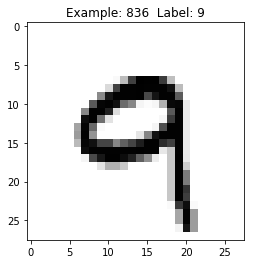

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


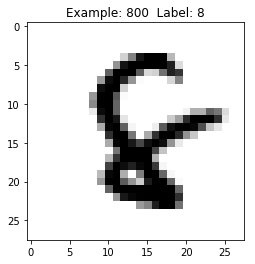

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


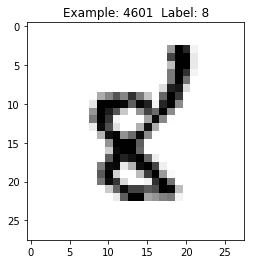

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


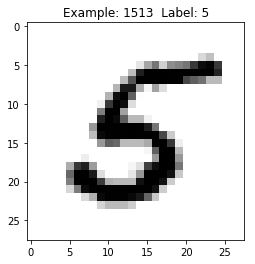

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


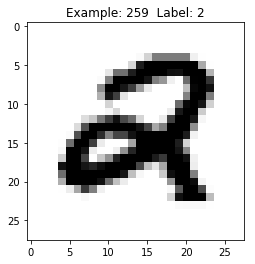

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


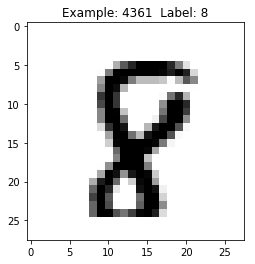

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


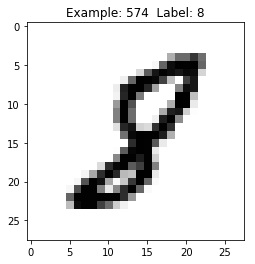

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


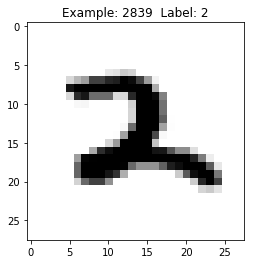

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


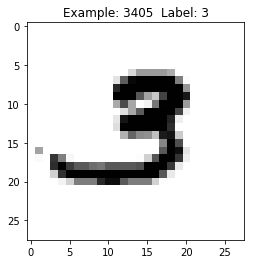

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


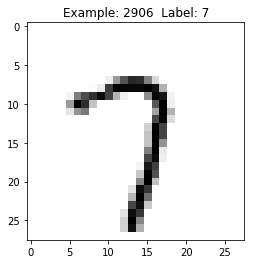

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


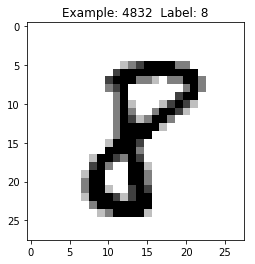

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


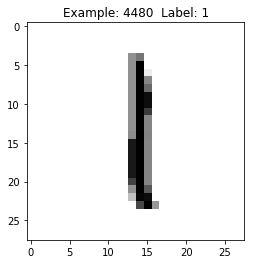

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


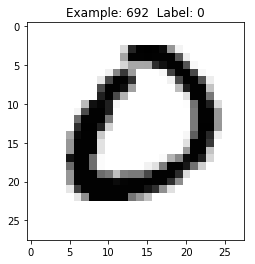

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


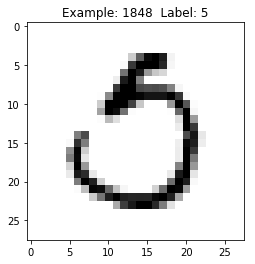

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


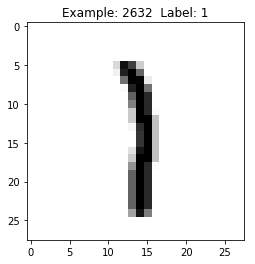

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


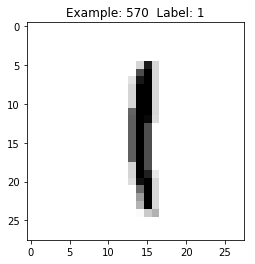

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


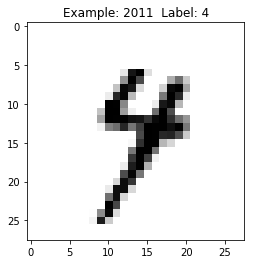

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


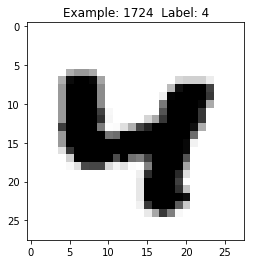

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


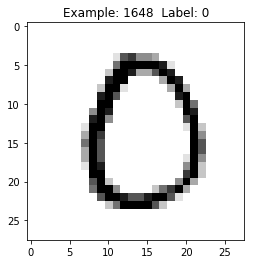

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


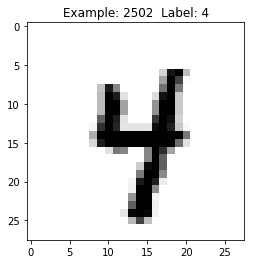

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


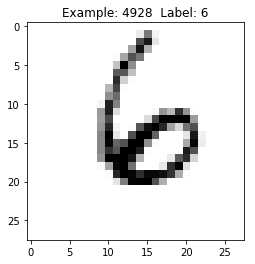

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


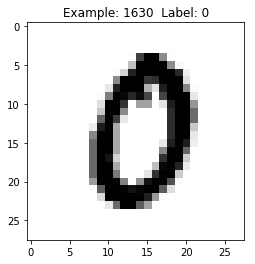

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


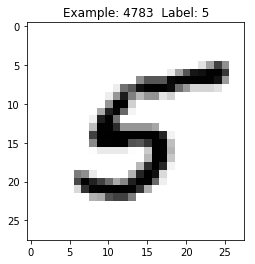

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


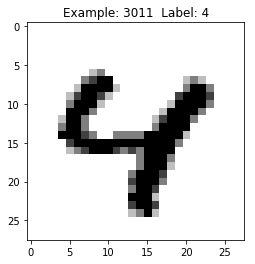

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


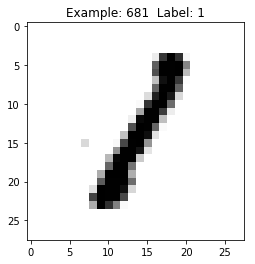

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


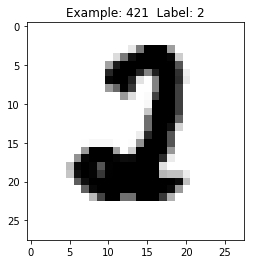

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


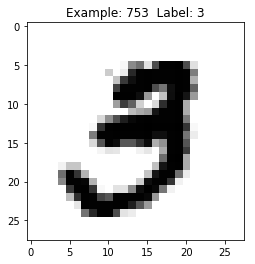

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


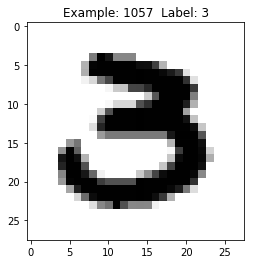

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


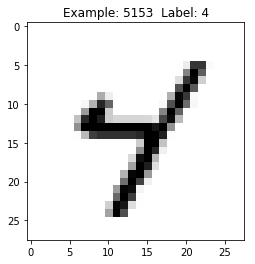

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


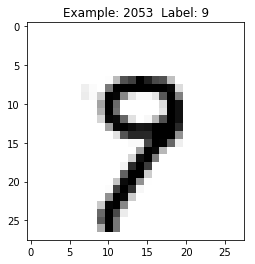

In [5]:
# Display 30 random digits
for i in range(30):
    selected = random.randint(0,5500-1)
    display_digit(selected, X_train, Y_train)

In [24]:
# n features, k classes
n = 784
k = 10

# INSTRUCTIONS: Complete the code for Steps 3-7

# STEP 3: Create placeholders for features and labels
# ======== YOUR CODE ==========
#
X = tf.placeholder(tf.float32, [None, n], name='X')
Y = tf.placeholder(tf.float32, [None, k], name='Y')

# STEP 4: Create weights and bias
# ======== YOUR CODE ==========
#
W = tf.Variable(tf.zeros([n, k]), name="weights")
b = tf.Variable(tf.zeros([k]), name="bias")

# STEP 5: Predict Y from X and W, b
# ======== YOUR CODE ==========
#
P = tf.nn.softmax(tf.matmul(X, W) + b) # m by k matrix
Y_predicted = tf.argmax(P, 1)

# STEP 6: Define loss function
# ======== YOUR CODE ==========
#
loss = tf.reduce_mean(-tf.reduce_sum( Y*tf.log(P), 1 )) 

# STEP 7: Gradient Descent
# ======== YOUR CODE ==========
#
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# STEP 8: Calculate accuracy
correct = tf.equal(Y_predicted, tf.argmax(Y, 1))
correct_rate = tf.reduce_mean(tf.cast(correct, tf.float32))
accuracy = tf.stack([correct_rate, correct_rate*100])


In [25]:
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Train model
    for i in range(train_steps+1):
        sess.run([optimizer, loss], feed_dict={X: X_train,Y: Y_train})
        if i%100 == 0:
            print('Training Step: ', i)
            print('Accuracy:', sess.run(accuracy, feed_dict={X: X_test, Y: Y_test}))
    
    # Obtain weights
    W_values = sess.run(W)
        

Training Step:  0
Accuracy: [ 0.593 59.3  ]
Training Step:  100
Accuracy: [ 0.731 73.1  ]
Training Step:  200
Accuracy: [ 0.763 76.3  ]
Training Step:  300
Accuracy: [ 0.78 78.  ]
Training Step:  400
Accuracy: [ 0.796 79.6  ]
Training Step:  500
Accuracy: [ 0.805 80.5  ]
Training Step:  600
Accuracy: [ 0.815 81.5  ]
Training Step:  700
Accuracy: [ 0.823 82.3  ]
Training Step:  800
Accuracy: [ 0.829 82.9  ]
Training Step:  900
Accuracy: [ 0.832    83.200005]
Training Step:  1000
Accuracy: [ 0.837    83.700005]
Training Step:  1100
Accuracy: [ 0.843 84.3  ]
Training Step:  1200
Accuracy: [ 0.847 84.7  ]
Training Step:  1300
Accuracy: [ 0.85 85.  ]
Training Step:  1400
Accuracy: [ 0.85 85.  ]
Training Step:  1500
Accuracy: [ 0.852 85.2  ]
Training Step:  1600
Accuracy: [ 0.853    85.299995]
Training Step:  1700
Accuracy: [ 0.855 85.5  ]
Training Step:  1800
Accuracy: [ 0.854    85.399994]
Training Step:  1900
Accuracy: [ 0.856 85.6  ]
Training Step:  2000
Accuracy: [ 0.859 85.9  ]
Trainin

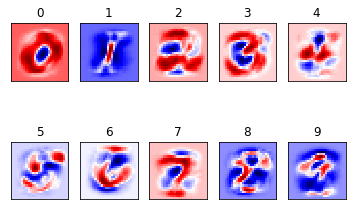

In [16]:
# Display the weights
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W_values[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
plt.show()
